# Utilities

> For basic functions

In [ ]:
#| default_exp utils

In [ ]:
#| hide
from nbdev.showdoc import *

In [ ]:
# | export
import logging


def get_src_path(
    pkg_name="parag",
) -> str:
    """Get the package's source directory path.

    Returns:
        str: path
    """
    import os
    import logging
    import site
    from pathlib import Path

    src_path = f"{site.getsitepackages()[0]}/{pkg_name}/"
    if not Path(src_path).exists():
        logging.warning("package is installed in the development mode")
        # import pkg_name
        # src_path=str(Path(pkg_name.__file__).parent)
        if "__file__" in globals():
            src_path = str(Path(os.path.realpath(__file__)).parent)
        else:
            src_path = "."
            logging.warning("running the function in a nbdev nb")
    return src_path


def _set_defaults(
    d1: dict,
    defaults: dict,
):
    """Set defauls in the vega config

    Args:
        d1 (dict): config
        defaults (dict): defaiults

    Returns:
        dict: updated config
    """
    for d in d1["signals"]:
        if d["name"] in defaults:
            d["value"] = defaults[d["name"]]
    return d1


def display_plot(
    spec: dict,
    method: str = "vega",  # vegalite
    defaults: dict = None,
):
    """Display plot

    Args:
        spec (dict): vega config
        method (str, optional): method. Defaults to 'vega'.
    """

    if not defaults is None:
        spec = _set_defaults(
            spec,
            defaults,
        )
        logging.info("custom defaults were set.")
    bundle = {}
    bundle[f"application/vnd.{method}.v5+json"] = spec
    # bundle['application/vnd.vegalite.v4+json'] = spec
    from IPython.core.display_functions import display
    return display(bundle, raw=True)


def export_plot(
    spec: dict,
    outp: str,
    redirect=None,
    hyperlink=None,
    verbose=False,
):
    """Export the vega plot

    Args:
        spec (dict): vega config
        outp (str): output path
        redirect: for redirecting the outputs displayed
    """
    # for exporting the charts
    import vl_convert as vlc

    # for embedding charts
    from IPython.display import IFrame
    from IPython.display import Markdown

    # from pathlib import Path
    # raster_path=Path(outp).with_suffix('.png').as_posix()
    if outp.endswith("html"):
        with open(outp, "w") as f:
            f.write(vlc.vega_to_html(spec))
        if verbose:
            print(outp if redirect is None else redirect(outp))
        return IFrame(src=outp if redirect is None else redirect(outp), width="100%", height=1000)
    if outp.endswith("png"):
        with open(outp, "wb") as f:
            f.write(vlc.vega_to_png(spec))
        s=f"[![]({outp})]({hyperlink})"
        if verbose:
            print(s)
        # return Markdown(f"[![]({outp})]({outp.replace('.png','.html')})")
        # return Markdown(f'<img src="{outp}" alt="" title="" />')
        return Markdown(s)

# aes
def get_colors(
    subsets: list,
    cmap_subsets: str = None,
    test: bool = False,
) -> dict:
    """Get colors by items

    Args:
        subsets (list): list of items
        cmap_subsets (str, optional): colormap. Defaults to None.
        test (bool, optional): test-mode. Defaults to False.

    Returns:
        dict: colors by items
    """
    import seaborn as sns  # for the matching color palette

    if cmap_subsets is None:
        cmap_subsets = sns.color_palette("colorblind")
    if test:
        sns.palplot(cmap_subsets)
    from roux.viz.colors import get_ncolors

    return dict(
        zip(
            subsets,
            get_ncolors(len(subsets), cmap=cmap_subsets)
            if isinstance(cmap_subsets, str)
            else cmap_subsets.as_hex()[: len(subsets)],
        )
    )

In [ ]:
get_src_path(
    'parag'
    )

'.'

In [ ]:
display_plot({
  # "$schema": "https://vega.github.io/schema/vega-lite/v5.json",
  "description": "A simple bar chart with embedded data.",
  "data": {
    "values": [
      {"a": "A", "b": 28}, {"a": "B", "b": 55}, {"a": "C", "b": 43},
      {"a": "D", "b": 91}, {"a": "E", "b": 81}, {"a": "F", "b": 53},
      {"a": "G", "b": 19}, {"a": "H", "b": 87}, {"a": "I", "b": 52}
    ]
  },
  "mark": "bar",
  "encoding": {
    "x": {"field": "a", "type": "nominal", "axis": {"labelAngle": 0}},
    "y": {"field": "b", "type": "quantitative"}
  }
}
)

{0: '#0173b2', 1: '#de8f05', 2: '#029e73', 3: '#d55e00', 4: '#cc78bc'}

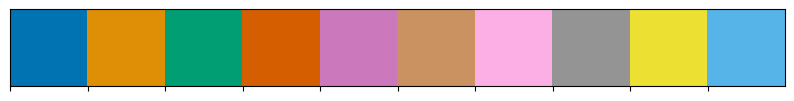

In [ ]:
get_colors(
    subsets=range(5),
    cmap_subsets=None,
    test=True,
    )

In [ ]:
#| hide
import nbdev; nbdev.nbdev_export()